In [94]:
# Import helpful libraries (yay)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [95]:
# Let's read in the training data set
data = pd.read_csv("./data/train.csv")

# Examine the first 5 rows of data
data.head()

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
0,Female,18,Urban,Greater than 3,Apart,at_home,teacher,mother,25,2,...,yes,no,no,4,3,4,1,1,6,0.30
1,Male,16,Urban,Greater than 3,Together,health,other,father,10,2,...,yes,yes,no,4,2,4,2,4,2,0.65
2,Male,15,Urban,Greater than 3,Together,other,teacher,father,25,2,...,yes,no,no,4,4,3,1,1,2,0.70
3,Male,16,Urban,Less than 3,Together,other,other,mother,10,2,...,yes,yes,yes,4,2,3,1,2,0,0.80
4,Female,17,Urban,Less than 3,Together,services,services,father,10,4,...,yes,yes,yes,3,4,1,1,1,0,0.00


In [96]:
# An overview of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               835 non-null    object 
 1   age               835 non-null    int64  
 2   address           835 non-null    object 
 3   family_size       835 non-null    object 
 4   parents_together  835 non-null    object 
 5   mother_job        835 non-null    object 
 6   father_job        835 non-null    object 
 7   guardian          835 non-null    object 
 8   travel_time       835 non-null    int64  
 9   study_time        835 non-null    int64  
 10  failed_classes    835 non-null    int64  
 11  school_support    835 non-null    object 
 12  extra_curricular  835 non-null    object 
 13  want_higher       835 non-null    object 
 14  internet          835 non-null    object 
 15  romantic_rel      835 non-null    object 
 16  family_rel        835 non-null    int64  
 1

In [97]:
data.shape

(835, 23)

In [98]:
data.isnull().sum() # No missing values

sex                 0
age                 0
address             0
family_size         0
parents_together    0
mother_job          0
father_job          0
guardian            0
travel_time         0
study_time          0
failed_classes      0
school_support      0
extra_curricular    0
want_higher         0
internet            0
romantic_rel        0
family_rel          0
free_time           0
go_out              0
workday_alcohol     0
weekend_alcohol     0
absences            0
grade               0
dtype: int64

In [99]:
# Checking for duplicate data
data[data.duplicated(keep = 'first')]

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
293,Female,15,Urban,Greater than 3,Apart,services,services,mother,10,2,...,yes,yes,no,4,3,2,1,1,0,0.75
313,Female,16,Urban,Less than 3,Together,other,health,father,25,2,...,yes,yes,yes,4,2,2,1,2,2,0.65
355,Female,17,Urban,Greater than 3,Together,health,health,father,10,4,...,yes,yes,no,5,2,2,1,2,0,0.90
588,Male,15,Urban,Less than 3,Together,other,other,mother,10,2,...,yes,yes,no,5,3,2,1,1,0,0.60
668,Male,17,Urban,Less than 3,Together,teacher,other,mother,10,2,...,yes,yes,no,4,4,4,1,3,0,0.50
689,Female,17,Urban,Greater than 3,Together,services,services,father,10,2,...,yes,no,no,5,4,2,2,3,0,0.85
696,Female,16,Urban,Greater than 3,Together,services,other,mother,10,2,...,yes,yes,no,4,2,3,1,1,2,0.80
700,Male,19,Rural,Greater than 3,Together,other,services,mother,25,1,...,yes,no,no,4,3,2,1,3,0,0.00
829,Female,17,Urban,Less than 3,Together,at_home,at_home,father,25,3,...,yes,yes,no,3,3,3,2,3,0,0.75


In [100]:
data = data.drop_duplicates(keep = 'first')
data.shape

(826, 23)

In [101]:
# Replace yes with 1 and no with 0 in 'school_support', 'extra_curricular', 'want_higher', 'internet', 'romantic_rel' columns
data.replace({'yes':1,'no':0},inplace=True)

# Replace Male with 1 and Female with 0 in 'sex' column
data['sex'].replace({'Male':1,'Female':0},inplace=True)

# Replace Rural with 1 and Urban with 0 in 'address' column
data['address'].replace({'Rural':1,'Urban':0},inplace=True)

# Replace 'Greater than 3' with 1 and 'Less than 3' with 0 in 'famiy_size' column
data['family_size'].replace({'Greater than 3':1,'Less than 3':0},inplace=True)

# Replace Together with 1 and Apart with 0 in 'parents_together' column
data['parents_together'].replace({'Together':1,'Apart':0},inplace=True)

# Replace at_home with 0, health with 1, services with 2, teacher with 3 and other with 4 in 'mother_job' and 'father_job' columns
data.replace({'at_home':0,'health':1, 'services':2, 'teacher':3, 'other':4},inplace=True)

# Replace father with 0, mother with 1 and other with 2 in 'guardian' column
data['guardian'].replace({'father':0, 'mother':1, 'other':'2'},inplace=True)

In [102]:
data.head()

,sex,age,address,family_size,parents_together,mother_job,father_job,guardian,travel_time,study_time,...,want_higher,internet,romantic_rel,family_rel,free_time,go_out,workday_alcohol,weekend_alcohol,absences,grade
0,0,18,0,1,0,0,3,1,25,2,...,1,0,0,4,3,4,1,1,6,0.30
1,1,16,0,1,1,1,4,0,10,2,...,1,1,0,4,2,4,2,4,2,0.65
2,1,15,0,1,1,4,3,0,25,2,...,1,0,0,4,4,3,1,1,2,0.70
3,1,16,0,0,1,4,4,1,10,2,...,1,1,1,4,2,3,1,2,0,0.80
4,0,17,0,0,1,2,2,0,10,4,...,1,1,1,3,4,1,1,1,0,0.00


In [103]:
# Split dataset into training (80%) and test sets (20%)
X = data.drop('grade', axis = 1)
y = data['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=104)

In [117]:
# Calculate top 3 and bottom 3 correlations of each feature with the target 'grade'.
corr_matrix = np.corrcoef(data, rowvar=False)
top_3_index = np.argsort(np.abs(corr_matrix[:,1]))[-4:-1]
bottom_3_index = np.argsort(np.abs(corr_matrix[:,1]))[0:3]

top_3 = np.array(data.columns)[top_3_index]
bottom_3 = np.array(data.columns)[bottom_3_index]
print("Most correlated with grade " + top_3)
print("\n")
print("Least correlated with grade " + bottom_3)

['Most correlated with grade want_higher'
 'Most correlated with grade failed_classes'
 'Most correlated with grade guardian']


['Least correlated with grade family_rel'
 'Least correlated with grade father_job'
 'Least correlated with grade free_time']


In [104]:
# Specify a sklearn pipiline that will perform standard scaling to feature points
pipeline = Pipeline([('scaler', StandardScaler())])

# Let's explore three models: linear regression, Kernel Ridge regression, support vector regression
LR_pipeline = make_pipeline(pipeline, LinearRegression())
KR_pipeline = make_pipeline(pipeline, KernelRidge())
SVR_pipeline = make_pipeline(pipeline, SVR())

# Calculate rmse for training data on all three models
y_train_predict = LR_pipeline.fit(X_train, y_train).predict(X_train)
rmse_train_LR = np.sqrt(mean_squared_error(y_train, y_train_predict))

y_train_predict= KR_pipeline.fit(X_train, y_train).predict(X_train)
rmse_train_KR = np.sqrt(mean_squared_error(y_train, y_train_predict))

y_train_predict= SVR_pipeline.fit(X_train, y_train).predict(X_train)
rmse_train_SVR = np.sqrt(mean_squared_error(y_train, y_train_predict))

print('Linear model RMSE on training data:', rmse_train_LR)
print('Kernel Ridge model RMSE on training data:', rmse_train_KR)
print('Support Vector model RMSE on training data:', rmse_train_SVR)

Linear model RMSE on training data: 0.17665390014160126
Kernel Ridge model RMSE on training data: 0.5937805609111677
Support Vector model RMSE on training data: 0.10586892233190802


Text(0, 0.5, 'Predicted')

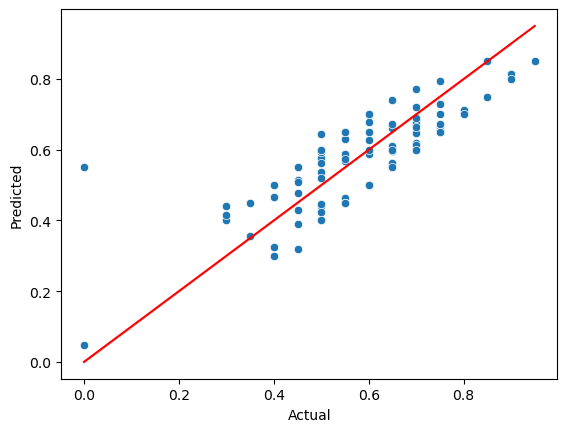

In [106]:
#The following code will show a visualisation of the fit of the best regression.

'''### LINEAR REGRESSION
y_train_pred = LR_pipeline.predict(X_train[:subset_size])
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)

sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

### KERNEL RIDGE REGRESSION
y_train_pred = KR_pipeline.predict(X_train[:subset_size])
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)

sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')'''

### SUPPORT VECTOR REGRESSION
subset_size = 100
y_train_pred = SVR_pipeline.predict(X_train[:subset_size])

# Then, create a scatterplot of predicted vs actual values
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)

# A perfect solution would look like the red line
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

#### Analyzing the rmse and graph correlation of the three regression models, we discovered that SVR performs best as it correlates to the data set. Hence, only the SVR scatterplot is displayed above.

In [112]:
# Perform a 5 fold cross validation on the KR model
'''kf = KFold(n_splits=5)
kf.split(X_train, y_train)
rmse_KR_list = np.empty(0)

# For each fold, predict the values for the validation and training sets
# Append the predictions to an array for mean and std dev calculations 

for train_index, valid_index in kf.split(X_train, y_train): 
    X_train_cv, X_valid_cv = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_cv, y_valid_cv = y_train.iloc[train_index], y_train.iloc[valid_index]

    y_pred_valid_KR = KR_pipeline.fit(X_train_cv, y_train_cv).predict(X_valid_cv)

    rmse_KR = np.sqrt(mean_squared_error(y_valid_cv, y_pred_valid_KR))

    rmse_KR_list = np.append(rmse_KR_list, rmse_KR)
    
rmse_KR_mean = rmse_KR_list.mean()
rmse_KR_std  = rmse_KR_list.std()
print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')

# Set hyperparameter arrays
kr_params = {'kernelridge__alpha': [0.01, 0.1, 1, 5, 10, 50, 100]}

# Define the GridSearchCV objects for each model
kr_cv = GridSearchCV(KR_pipeline, kr_params, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV objects to the training data
kr_cv.fit(X_train, y_train)

# Print the best hyperparameter setting for each model
print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)

# Create pipeline using the best hyperparameter
pipeline_best_kr = make_pipeline(kr_cv)

# Train and apply the chosen model to the test set
kr_predictions = kr_cv.best_estimator_.fit(X_train, y_train).predict(X_test)
kr_rmse = np.sqrt(mean_squared_error(y_test, kr_predictions))

print("Kernel Ridge Regression RMSE on test set:", kr_rmse)'''

Kernel Ridge Regression CV Scores:
Mean: 0.60, Std: 0.02

Best hyperparameter setting for Kernel Ridge Regression: {'kernelridge__alpha': 100}
Kernel Ridge Regression RMSE on test set: 0.5877829883476183


In [109]:
# Perform a 5 fold cross validation on the SVR model
kf = KFold(n_splits=5)
kf.split(X_train, y_train)
rmse_SVR_list = np.empty(0)

# For each fold, predict the values for the validation and training sets
# Append the predictions to an array for mean and std dev calculations 

for train_index, valid_index in kf.split(X_train, y_train): 
    X_train_cv, X_valid_cv = X_train.iloc[train_index], X_train.iloc[valid_index]
    y_train_cv, y_valid_cv = y_train.iloc[train_index], y_train.iloc[valid_index]

    y_pred_valid_SVR = SVR_pipeline.fit(X_train_cv, y_train_cv).predict(X_valid_cv)

    rmse_SVR = np.sqrt(mean_squared_error(y_valid_cv, y_pred_valid_SVR))

    rmse_SVR_list = np.append(rmse_SVR_list, rmse_SVR)
    
rmse_SVR_mean = rmse_SVR_list.mean()
rmse_SVR_std  = rmse_SVR_list.std()
print('Support Vector Regression CV Scores:') 
print(f'Mean: {rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')

Support Vector Regression CV Scores:
Mean: 0.18, Std: 0.01



In [110]:
# Use grid search to compare rmse obtained with different hyperparamter settings

# Set hyperparameter arrays
svr_params = {'svr__C': [0.01, 0.1, 0.3, 0.5, 1, 5, 10, 100]}

# Define the GridSearchCV object for SVR model
svr_cv = GridSearchCV(SVR_pipeline, svr_params, cv=5, scoring='neg_root_mean_squared_error')

# Fit the GridSearchCV object to the training data
svr_cv.fit(X_train, y_train)

# Print the best hyperparameter setting
print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# Create pipeline using the best hyperparameter
pipeline_best_svr = make_pipeline(svr_cv)

# Train and apply the oprimized model to the test set
svr_predictions = svr_cv.best_estimator_.fit(X_train, y_train).predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))

print("Support Vector Regression RMSE on test set:", svr_rmse)

Best hyperparameter setting for Support Vector Regression: {'svr__C': 0.3}
Support Vector Regression RMSE on test set: 0.1816660217234379


Text(0, 0.5, 'Predicted')

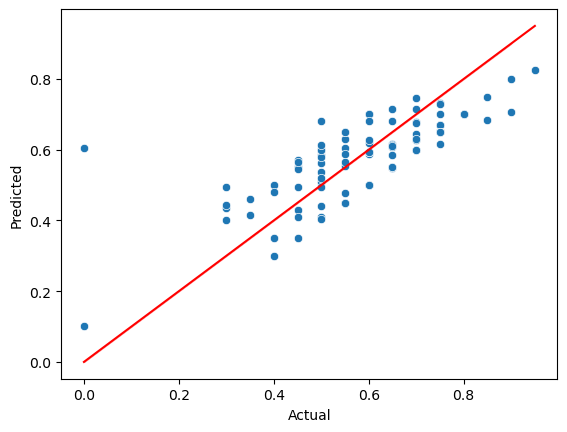

In [111]:
# use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 100
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')